In [2]:
#  Import Necessary Libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

#  Load dataset
df = pd.read_csv('FrontDoorImages_Metadata.csv')

#  Handle missing values
df['Suggestion_Keywords'] = df['Suggestion_Keywords'].fillna('unknown')

# ✅Clean and preprocess keywords
def clean_keywords(keywords):
    cleaned = [kw.strip().replace(" ", "").lower() for kw in keywords.split(",")]
    return ",".join(cleaned)

df['Initial_Processed_Keywords'] = df['Suggestion_Keywords'].apply(clean_keywords)

#  Convert text to numerical format using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=3000)
X = vectorizer.fit_transform(df['Initial_Processed_Keywords'].dropna())

#  Convert data into Gensim format for coherence scoring
texts = [text.split(",") for text in df['Initial_Processed_Keywords'].dropna()]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

#  Function to compute coherence score dynamically
def compute_coherence_score(n_topics):
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model.fit(X)

    words = vectorizer.get_feature_names_out()
    topics = [[words[j] for j in topic.argsort()[-10:]] for topic in lda_model.components_]

    topic_word_ids = [[dictionary.token2id[word] for word in topic if word in dictionary.token2id] for topic in topics]

    if any(len(topic) == 0 for topic in topic_word_ids):
        return 0  # Prevent empty topics from affecting coherence

    coherence_model = CoherenceModel(topics=topic_word_ids, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

#  Compute coherence scores for a range of topics
topic_range = range(3, 12)  # Testing topics from 3 to 11
coherence_scores = [compute_coherence_score(n) for n in topic_range]

#  Get the top 3 best topic counts based on coherence scores
top_3_indices = np.argsort(coherence_scores)[-3:][::-1]  # Get indices of top 3 scores
top_3_topics = [topic_range[i] for i in top_3_indices]
print(f" Best 3 topic counts based on coherence score: {top_3_topics}")

#  Function to apply LDA and extract topics dynamically
def apply_lda(n_components, X, vectorizer):
    """Train LDA model and return topic assignments and extracted topics"""
    lda = LatentDirichletAllocation(n_components=n_components, random_state=42)
    lda.fit(X)

    words = vectorizer.get_feature_names_out()
    topics_dict = {}

    # Extract Top Words for Each Topic
    print(f"\n LDA with {n_components} topics:")
    for i, topic in enumerate(lda.components_):
        top_words = [words[j] for j in topic.argsort()[-10:]]  # Get top 10 words per topic
        topics_dict[f"Topic {i+1}"] = top_words
        print(f" Topic {i+1}: {', '.join(top_words)}")

    # Assign topics to each row in the dataset
    topic_assignments = lda.transform(X).argmax(axis=1)
    return topic_assignments, topics_dict

#  Apply LDA for the **top 3 best coherence scores**
topics_summary = {}
for n_topics in top_3_topics:
    df[f'Topic_{n_topics}'], topics_summary[f'Topics_{n_topics}'] = apply_lda(n_topics, X, vectorizer)

#  Save Final Dataset with Multiple Topic Assignments
df.to_csv('Prior_Front_Door_Image_Info_With_Top_3_Topics.csv', index=False)
print(" Final dataset with multiple topic assignments saved!")

#  Save Topics Summary Separately
topics_df = pd.DataFrame.from_dict(topics_summary, orient='index').transpose()
topics_df.to_csv('Prior_LDA_Topics_Top_3_Summary.csv', index=False)
print(" Topics summary for top 3 coherence scores saved separately!")


 Best 3 topic counts based on coherence score: [3, 6, 5]

 LDA with 3 topics:
 Topic 1: textsimplification, improvedlighting, exteriorrefresh, outdoordecor, curbappeal, signagesimplification, signrefresh, windowsignage, lightingimprovement, windowsimplification
 Topic 2: windowgraphics, signageupdate, outdoorseating, windowutilization, windowdecor, clutterreduction, visualsimplification, curbappeal, exteriorrefresh, exteriorlighting
 Topic 3: awningrefresh, exteriormaintenance, exteriorappeal, windowdisplayrefresh, windowdisplay, signupdate, lighting, windoworganization, enhancedlighting, lightingenhancement

 LDA with 6 topics:
 Topic 1: windowdesignupdate, textsimplification, signrefresh, visualsimplification, visualappeal, eveninglighting, signagesimplification, lightingimprovement, lightingenhancement, windowsignage
 Topic 2: moreinvitingseating, highlightpromotions, enhancedwindowgraphics, exteriorrefresh, signrefresh, windowdisplayrefresh, signenhancement, visualsimplification, l


📊 Training Model for Topic_3

 Processing Topic_3...
--------------------------------------------------

🔍 Finding best parameters for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'C': 100, 'solver': 'lbfgs'}

🔍 Finding best parameters for Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}

🔍 Finding best parameters for XGBoost...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.41      0.40        17
           1       0.33      0.36      0.34        14
           2       0.45      0.38      0.42        13

    accuracy                           0.39        44
   macro avg       0.39      0.38      0.39        44
weighted avg       0.39      0.39      0.39        44


 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.35      0.38        17
           1       0.35      0.43      0.39        14
           2       0.25      0.23      0.24        13

    accuracy                           0.34        44
   macro avg       0.33      0.34      0.33        44
weighted avg       0.34      0.34      0.34        44


 XGBoost Classification Report:
              precision    recal

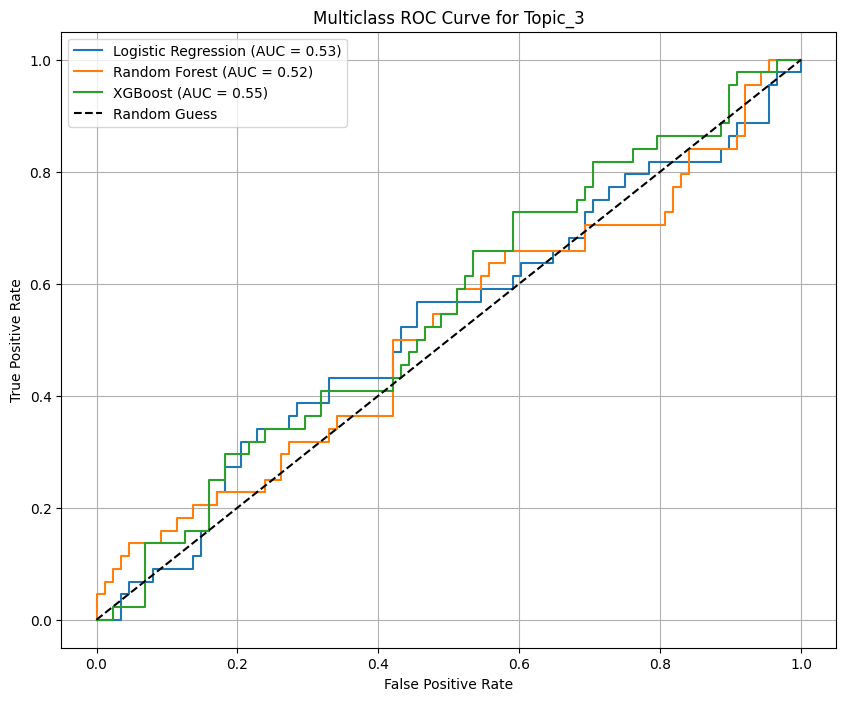

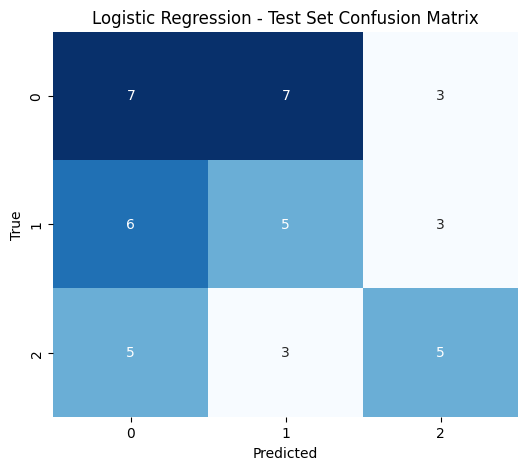

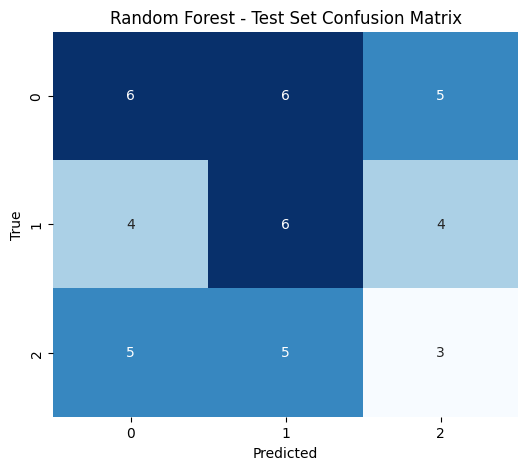

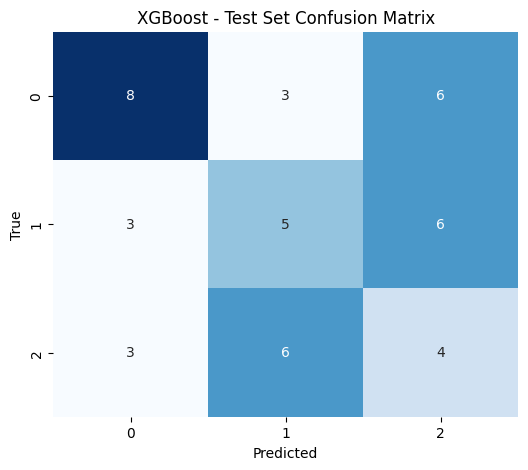


📊 Training Model for Topic_5

 Processing Topic_5...
--------------------------------------------------

🔍 Finding best parameters for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}

🔍 Finding best parameters for Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

🔍 Finding best parameters for XGBoost...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 50}

 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.20      0.18        10
           1       0.33      0.50      0.40         8
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00        10
           4       0.10      0.14      0.12         7

    accuracy                           0.16        44
   macro avg       0.12      0.17      0.14        44
weighted avg       0.11      0.16      0.13        44


 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.08      0.10      0.09        10
           1       0.00      0.00      0.00         8
           2       0.18      0.22      0.20         9
           3       0.00      0.00      0.00        10
           4       0.18      0.29      0.22         7

    accuracy

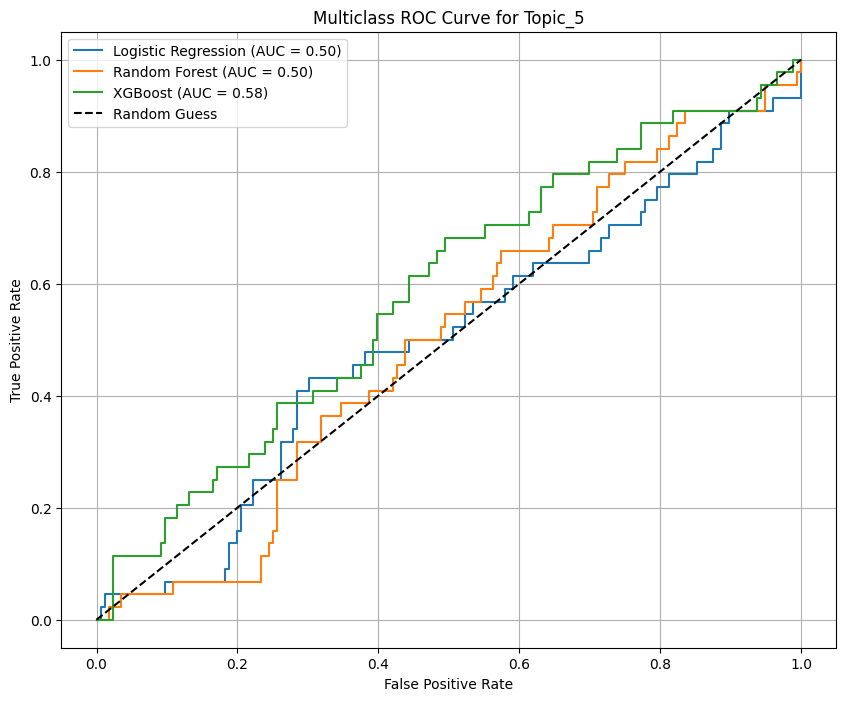

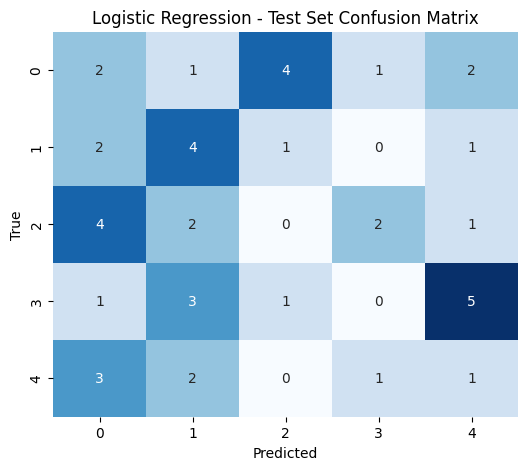

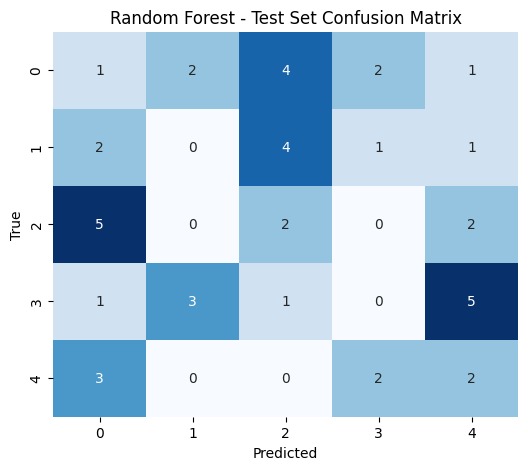

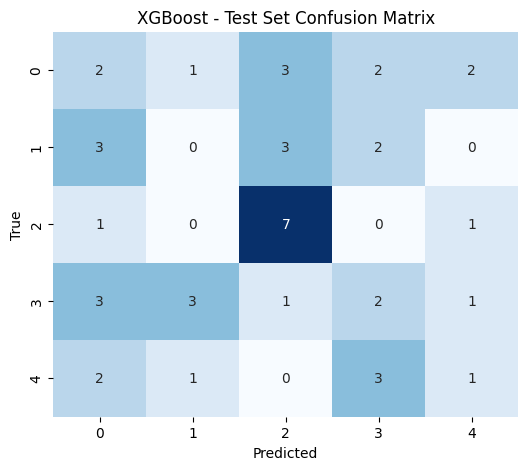


📊 Training Model for Topic_6

 Processing Topic_6...
--------------------------------------------------

🔍 Finding best parameters for Logistic Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'C': 100, 'solver': 'lbfgs'}

🔍 Finding best parameters for Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}

🔍 Finding best parameters for XGBoost...
Fitting 5 folds for each of 36 candidates, totalling 180 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:32:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packa

Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 50}

 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.20      0.11      0.14         9
           2       0.22      0.29      0.25         7
           3       0.00      0.00      0.00         6
           4       0.08      0.20      0.11         5
           5       0.11      0.11      0.11         9

    accuracy                           0.11        44
   macro avg       0.10      0.12      0.10        44
weighted avg       0.11      0.11      0.10        44


 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.38      0.33         8
           1       0.38      0.33      0.35         9
           2       0.14      0.14      0.14         7
           3       0.00      0.00      0.00         6
           4 

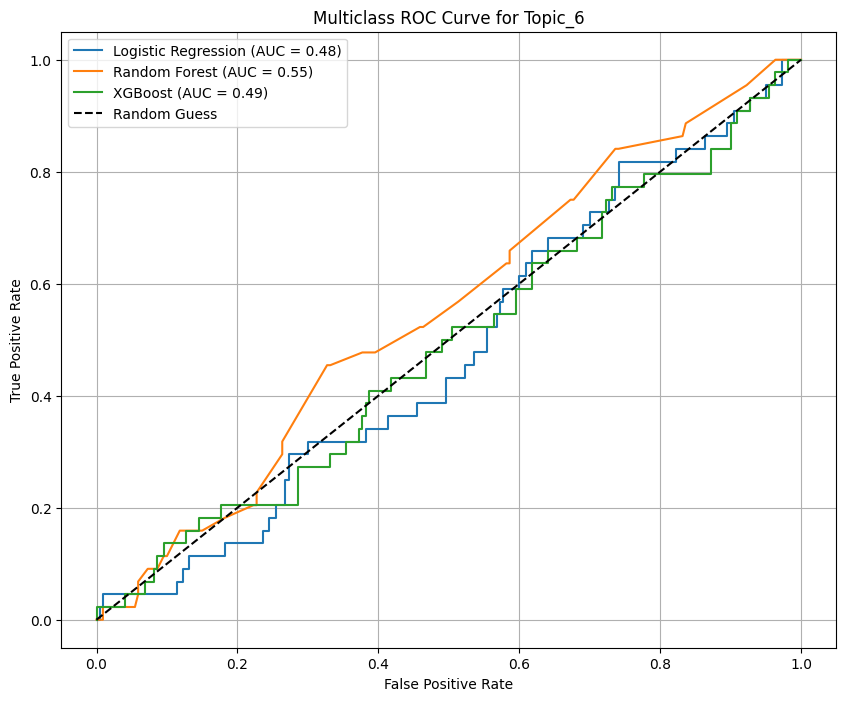

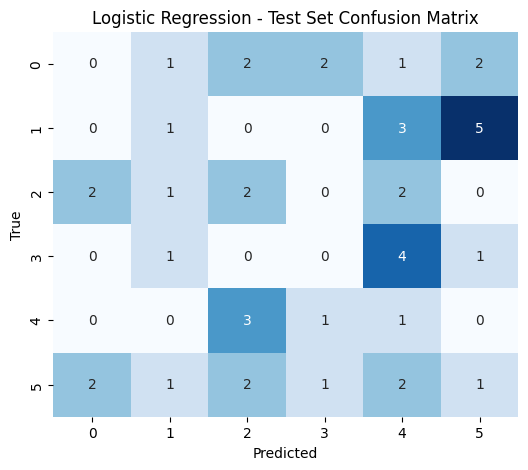

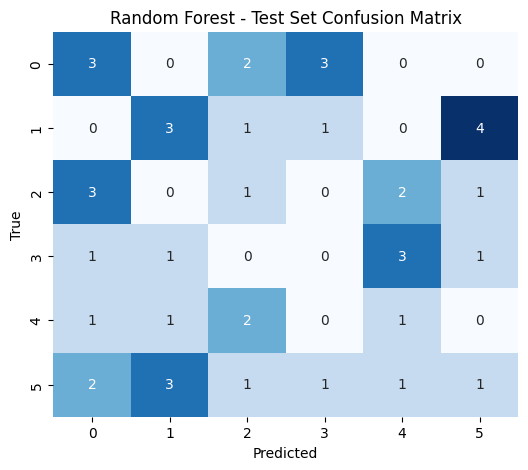

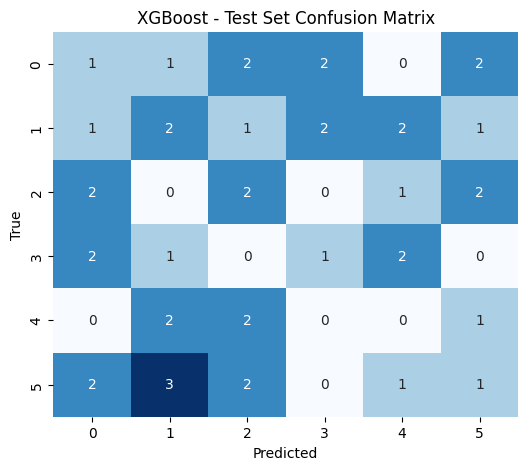


 All performance metrics saved to 'Prior_Performance_Topics.csv'!


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, accuracy_score, roc_auc_score

from imblearn.over_sampling import SMOTE  #  Handling Imbalance

#  Step 1: Load Data
df = pd.read_csv('Prior_Front_Door_Image_Info_With_Top_3_Topics.csv')

#  Step 2: Select Relevant Columns
selected_columns = [
    'Folder_Name', 'Store_Category', 'Store_Location',
    'Rescaled_NIMA Score', 'Rescaled_Paq2piq Average Local Score',
    'Rescaled_Paq2piq Normalized Global Score', 'Rescaled_Paq2piq Class',
    'Topic_3', 'Topic_5', 'Topic_6'
]
df = df[selected_columns]

#  Step 3: Separate Features (X) and Target (y)
numerical_cols = ['Rescaled_NIMA Score', 'Rescaled_Paq2piq Average Local Score', 'Rescaled_Paq2piq Normalized Global Score']
categorical_cols = ['Folder_Name', 'Store_Category', 'Store_Location', 'Rescaled_Paq2piq Class']
target_cols = ['Topic_3', 'Topic_5', 'Topic_6']

#  Step 4: Preprocessing Pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])

#  Step 5: Function to Train & Evaluate Models
def train_evaluate_and_visualize(X, y, topic_name):
    print(f"\n Processing {topic_name}...\n{'-' * 50}")

    #  Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    #  Apply SMOTE for balancing classes
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)

    #  Models and Hyperparameters
    models = {
        "Logistic Regression": {
            "model": LogisticRegression(max_iter=2000, random_state=42),
            "params": {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
        },
        "Random Forest": {
            "model": RandomForestClassifier(random_state=42),
            "params": {
                'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10]
            }
        },
        "XGBoost": {
            "model": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
            "params": {
                'n_estimators': [50, 100, 200], 'max_depth': [3, 6, 10],
                'learning_rate': [0.01, 0.05, 0.1, 0.2]
            }
        }
    }

    #  Train and Tune Models
    best_models = {}
    for name, details in models.items():
        print(f"\n🔍 Finding best parameters for {name}...")
        grid_search = GridSearchCV(
            details["model"], details["params"],
            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
            n_jobs=-1, verbose=1
        )
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_

        print(f"Best parameters for {name}: {grid_search.best_params_}")

    #  Evaluate Models
    performance = {}
    for name, model in best_models.items():
        print(f"\n {name} Classification Report:")
        y_pred = model.predict(X_test)
        print(classification_report(y_test, y_pred))

        # Store accuracy and AUC scores
        performance[name] = {
            'Accuracy': accuracy_score(y_test, y_pred),
            'AUC': roc_auc_score(pd.get_dummies(y_test), model.predict_proba(X_test), multi_class='ovr', average='macro')
        }

    #  Save Performance Metrics
    performance_df = pd.DataFrame(performance).T
    print("\n Performance Metrics:")
    print(performance_df)

    #  Plot ROC Curves
    plt.figure(figsize=(10, 8))
    for name, model in best_models.items():
        y_pred_prob = model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_pred_prob.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multiclass ROC Curve for {topic_name}')
    plt.legend()
    plt.grid()
    plt.show()

    #  Confusion Matrices
    for name, model in best_models.items():
        y_pred_test = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred_test)

        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f"{name} - Test Set Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

    return performance_df

#  Step 6: Train Models for Each Topic
final_performance = {}
for topic in target_cols:
    print(f"\n📊 Training Model for {topic}")
    X_processed = preprocessor.fit_transform(df.drop(columns=target_cols))
    y = df[topic]
    final_performance[topic] = train_evaluate_and_visualize(X_processed, y, topic)

#  Save Performance Results
final_performance_df = pd.concat(final_performance, axis=0)
final_performance_df.to_csv('Prior_Performance_Topics.csv')
print("\n All performance metrics saved to 'Prior_Performance_Topics.csv'!")
